In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Scripts/Laura_Debusschere/measurements.csv')

In [ ]:
# Read the CSV description file into a DataFrame
df_description = pd.read_csv('/content/drive/MyDrive/Scripts/Laura_Debusschere/Dataset_description_corrected.csv')

In [ ]:
# Merge df1 and df2 on 'id'
merged_df = pd.merge(df, df_description, on='Image', how='left')

In [ ]:
# prompt: Filter out from merged_df every row that is not Classification MecP2_enhanced
filtered_df = merged_df[merged_df['Classification'] == 'MecP2_enhanced']
filtered_df = merged_df.dropna()
filtered_df['Genotype'] = filtered_df['Genotype'].str.replace('WT ', 'WT')

<ipython-input-5-37dd22ce003f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Genotype'] = filtered_df['Genotype'].str.replace('WT ', 'WT')


,Image,Classification,Area µm^2,Length µm,Circularity,Solidity,Max diameter µm,Min diameter µm,MecP2: Mean,Genotype,Animal,Region
1,FL_FL_14179LR+_12w_MeCP2_LEDGF_20240605_LD-Sce...,MecP2_enhanced,53.6826,29.9045,0.7543,0.9318,10.8930,6.8582,2999.4312,KO,FL_FL_14179LR+_12w_MeCP2_LEDGF_20240605_LD,Cerebellum
2,FL_FL_14179LR+_12w_MeCP2_LEDGF_20240605_LD-Sce...,MecP2_enhanced,7.4127,13.6944,0.4967,0.7774,4.2019,2.9732,2408.2944,KO,FL_FL_14179LR+_12w_MeCP2_LEDGF_20240605_LD,Cerebellum
3,FL_FL_14179LR+_12w_MeCP2_LEDGF_20240605_LD-Sce...,MecP2_enhanced,7.7024,15.4121,0.4075,0.7575,4.3432,3.1035,2685.2737,KO,FL_FL_14179LR+_12w_MeCP2_LEDGF_20240605_LD,Cerebellum
5,FL_FL_14179LR+_12w_MeCP2_LEDGF_20240605_LD-Sce...,MecP2_enhanced,47.8530,26.6391,0.8474,0.9549,9.4163,7.5529,3283.4866,KO,FL_FL_14179LR+_12w_MeCP2_LEDGF_20240605_LD,Cerebellum
7,FL_FL_14179LR+_12w_MeCP2_LEDGF_20240605_LD-Sce...,MecP2_enhanced,14.1196,14.6586,0.8258,0.9549,4.7864,4.0384,6603.3760,KO,FL_FL_14179LR+_12w_MeCP2_LEDGF_20240605_LD,Cerebellum


In [ ]:
# Function to create frequency distribution plots
def plot_frequency_distribution(data, feature, group_col, group_val, ax):
    sns.histplot(data=data, x=feature, kde=True, ax=ax)
    ax.set_title(f"{feature} Distribution - {group_col}: {group_val}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    print(f"Plot created for {group_val}")

# Features to analyze
features = ['Length µm', 'Area µm^2']

# Group by Genotype, Region, and Animal
grouped = filtered_df.groupby(['Genotype', 'Region', 'Animal'])
print(f"Number of groups: {len(grouped)}")

# Create plots for each Genotype-Region combination
for feature in features:
    print(f"Processing feature: {feature}")
    genotypes = filtered_df['Genotype'].unique()
    regions = filtered_df['Region'].unique()
    print(f"Unique Genotypes: {genotypes}")
    print(f"Unique Regions: {regions}")

    fig, axes = plt.subplots(len(genotypes), len(regions), figsize=(20, 15))
    fig.suptitle(f"Frequency Distributions of {feature} by Genotype and Region")

    for i, genotype in enumerate(genotypes):
        for j, region in enumerate(regions):
            print(f"Processing Genotype: {genotype}, Region: {region}")
            ax = axes[i, j] if len(genotypes) > 1 and len(regions) > 1 else axes[i] if len(genotypes) > 1 else axes[j] if len(regions) > 1 else axes

            # Get data for this Genotype-Region combination
            # Iterate over the animals for the specific genotype and region
            animals = filtered_df[(filtered_df['Genotype'] == genotype) & (filtered_df['Region'] == region)]['Animal'].unique()
            print(f"Animals for this combination: {animals}")

            for animal in animals:
                try:
                    data = grouped.get_group((genotype, region, animal))
                    print(f"Data shape for {genotype}-{region}-{animal}: {data.shape}")
                    # Plot frequency distribution
                    plot_frequency_distribution(data, feature, f"Genotype-Region-Animal", f"{genotype}-{region}-{animal}", ax)
                except KeyError:
                    print(f"No data for combination: {genotype}-{region}-{animal}")

    plt.tight_layout()
    plt.savefig(f"{feature.replace(' ', '_')}_distribution.png")
    print(f"Figure saved: {feature.replace(' ', '_')}_distribution.png")
    plt.show()
    plt.close()

print("Script execution completed.")

We import necessary libraries for data manipulation (pandas), numerical operations (numpy), and plotting (matplotlib and seaborn).
We define two helper functions:

calculate_histograms: Creates both actual and normalized histograms of the data.
get_data_range: Calculates the range that includes a specified percentage of the data.


The main function plot_distributions_by_region:

Determines the global data range and creates bins.
Loops through each region and genotype to calculate histograms.
Creates a figure with subplots for each region, showing both actual counts and normalized frequencies.
Plots the mean histograms with shaded areas for standard deviation.
Sets appropriate labels, titles, and legends.
Saves and displays the figure.


Finally, we loop through each feature and call the main function to create the plots.


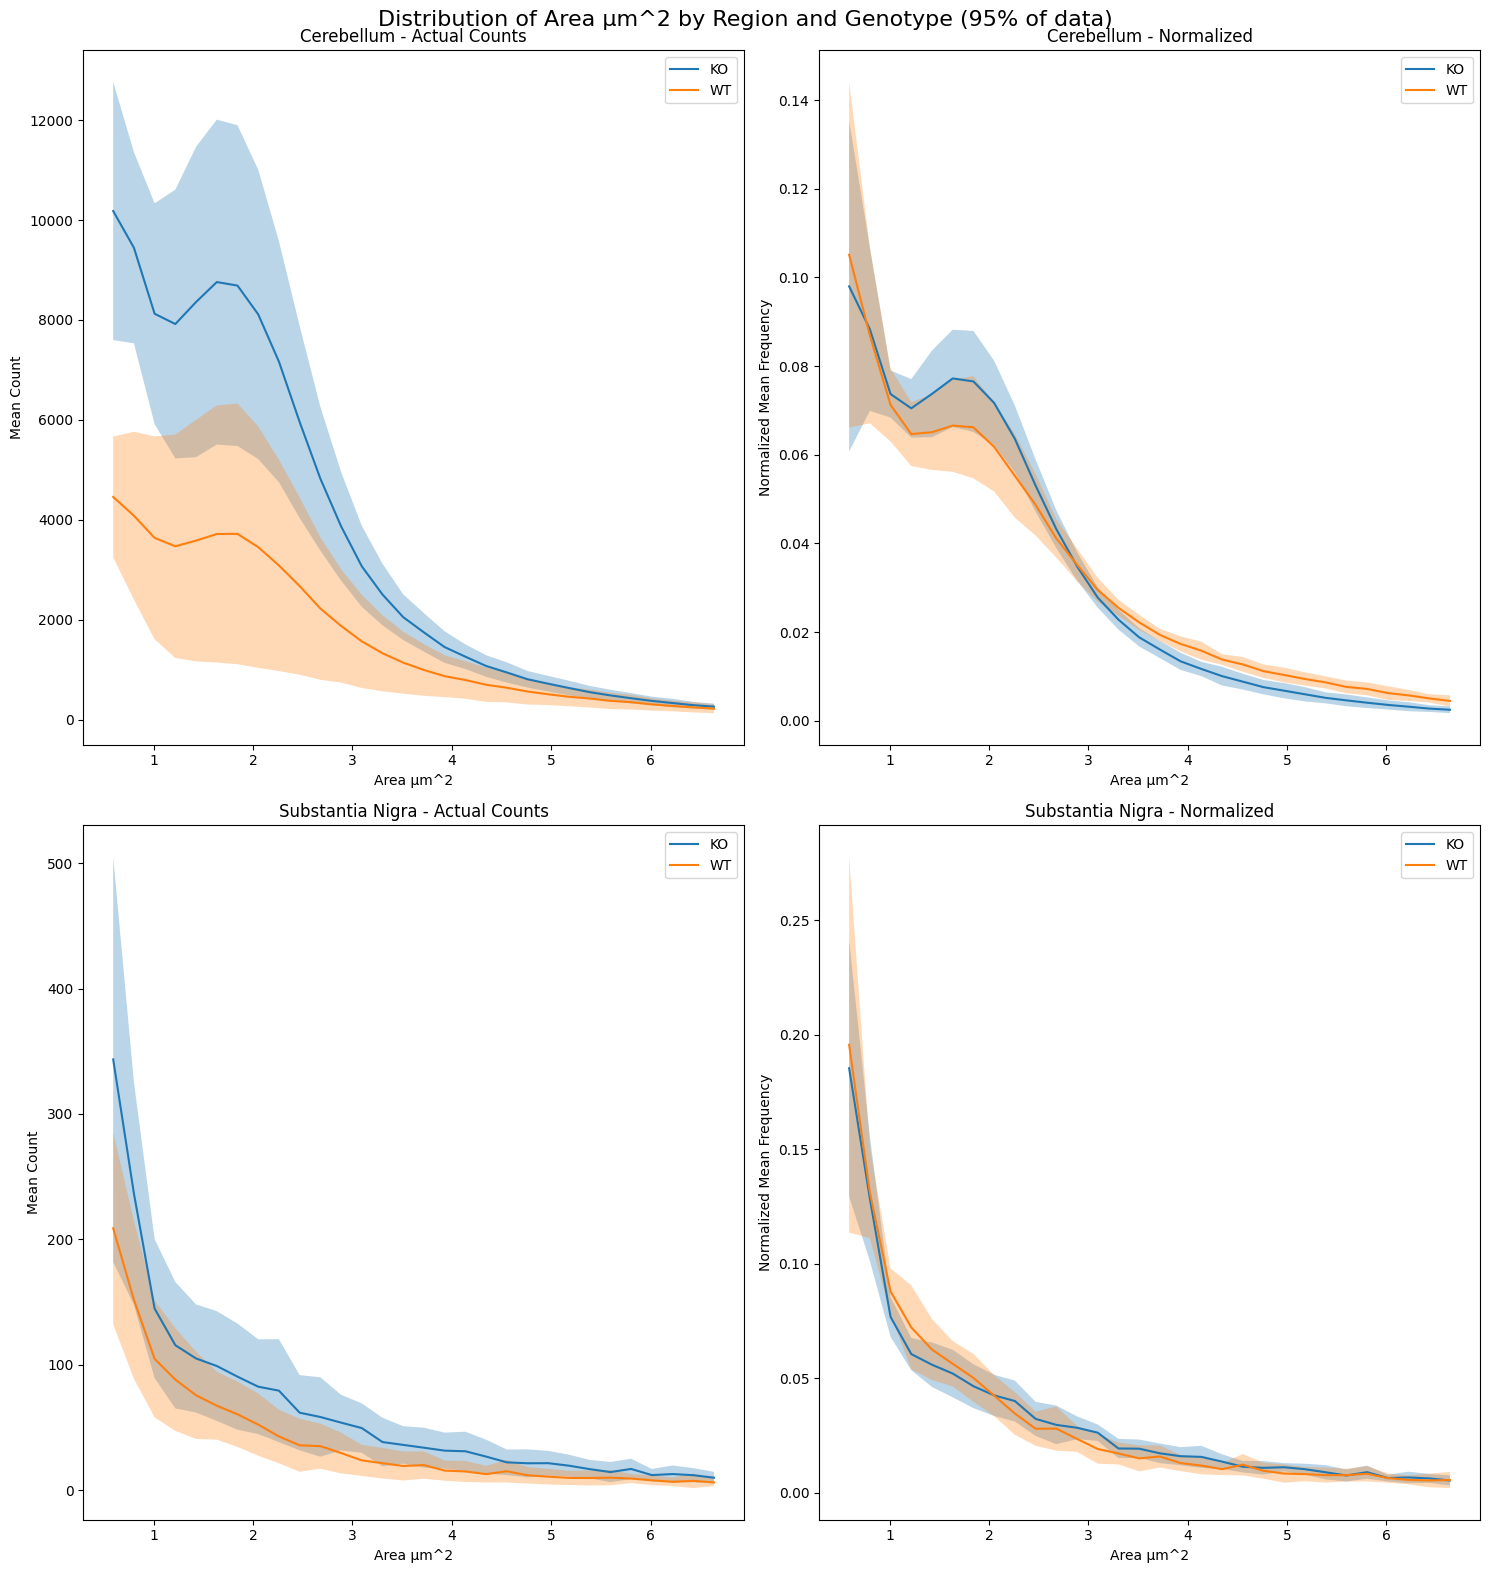

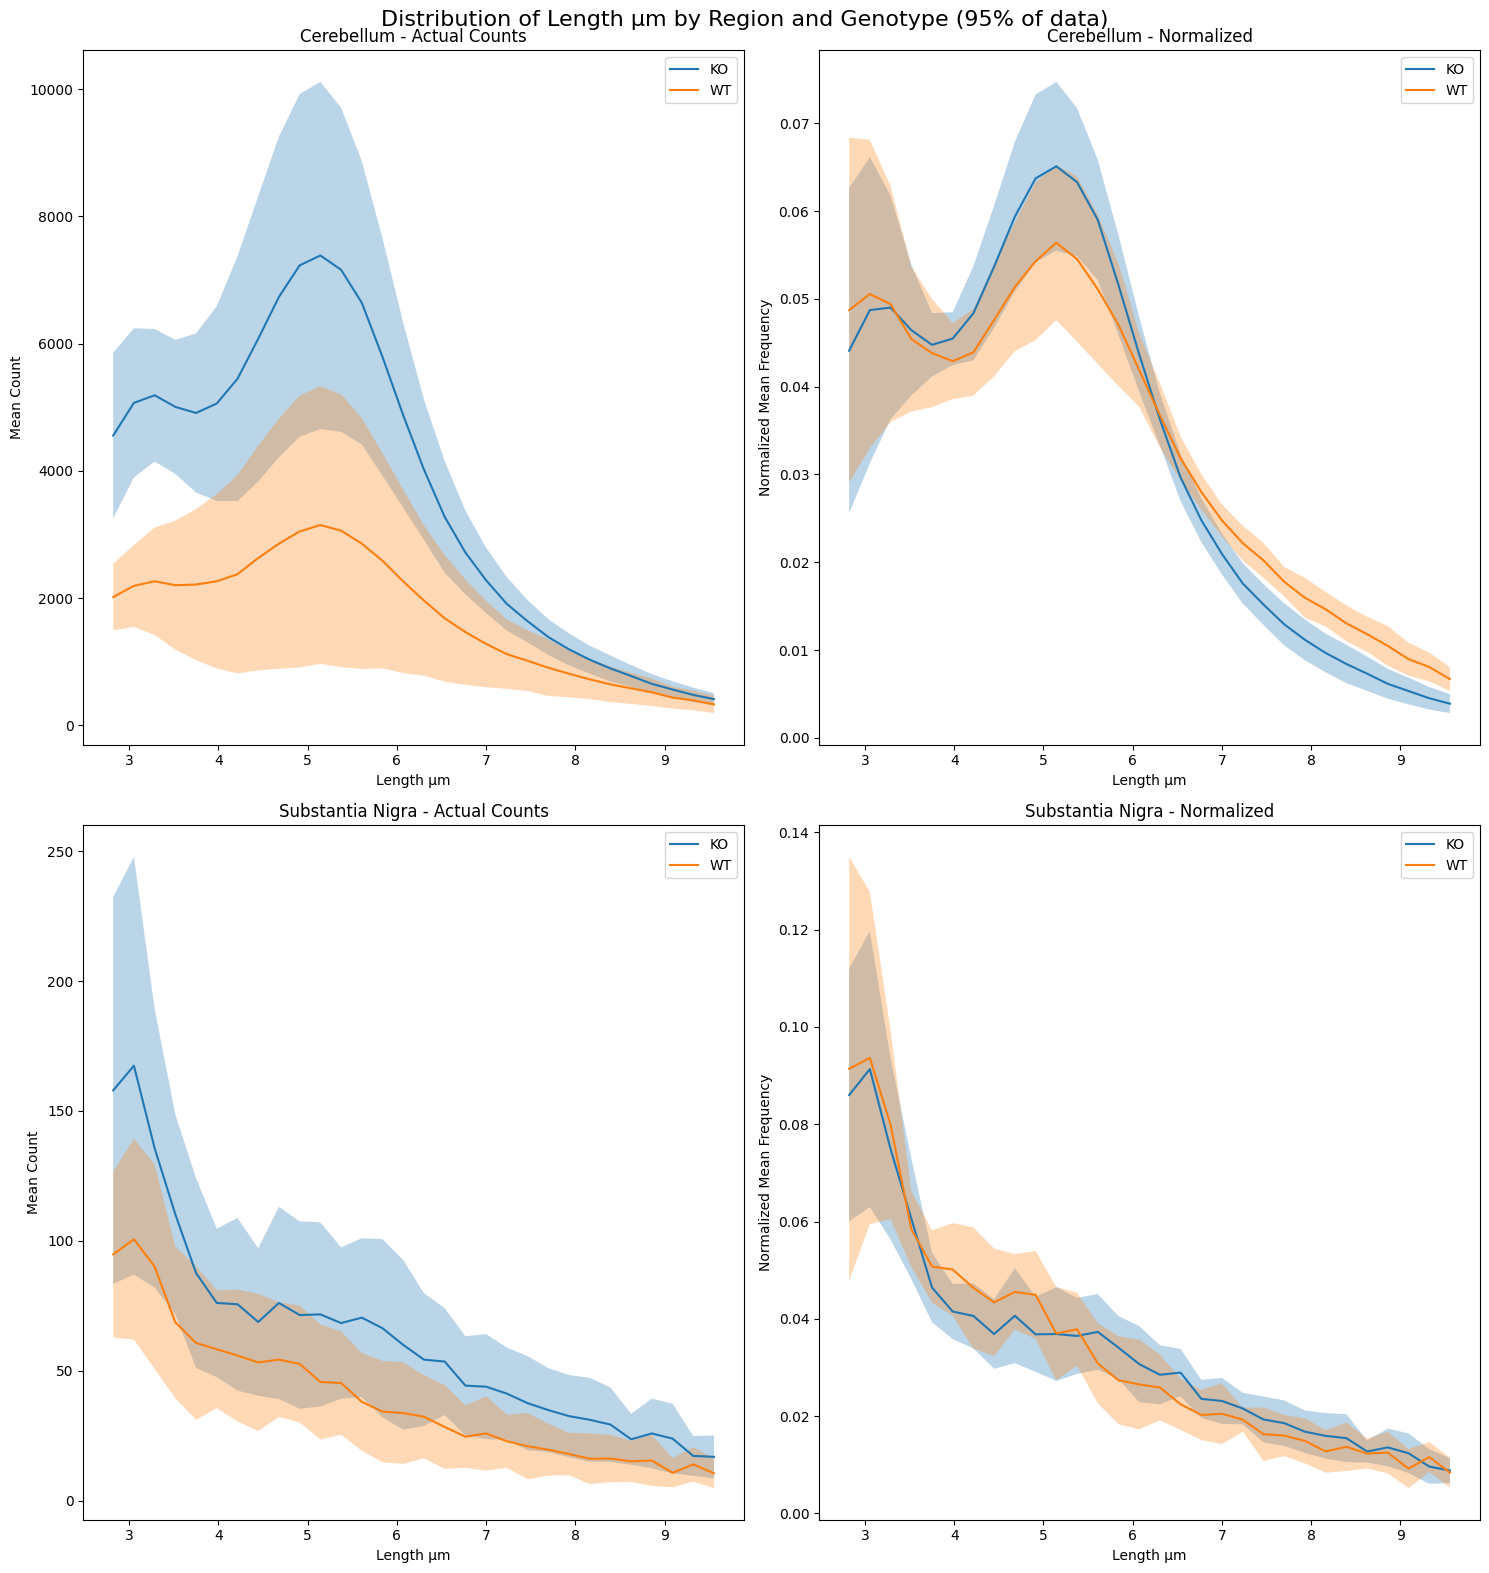

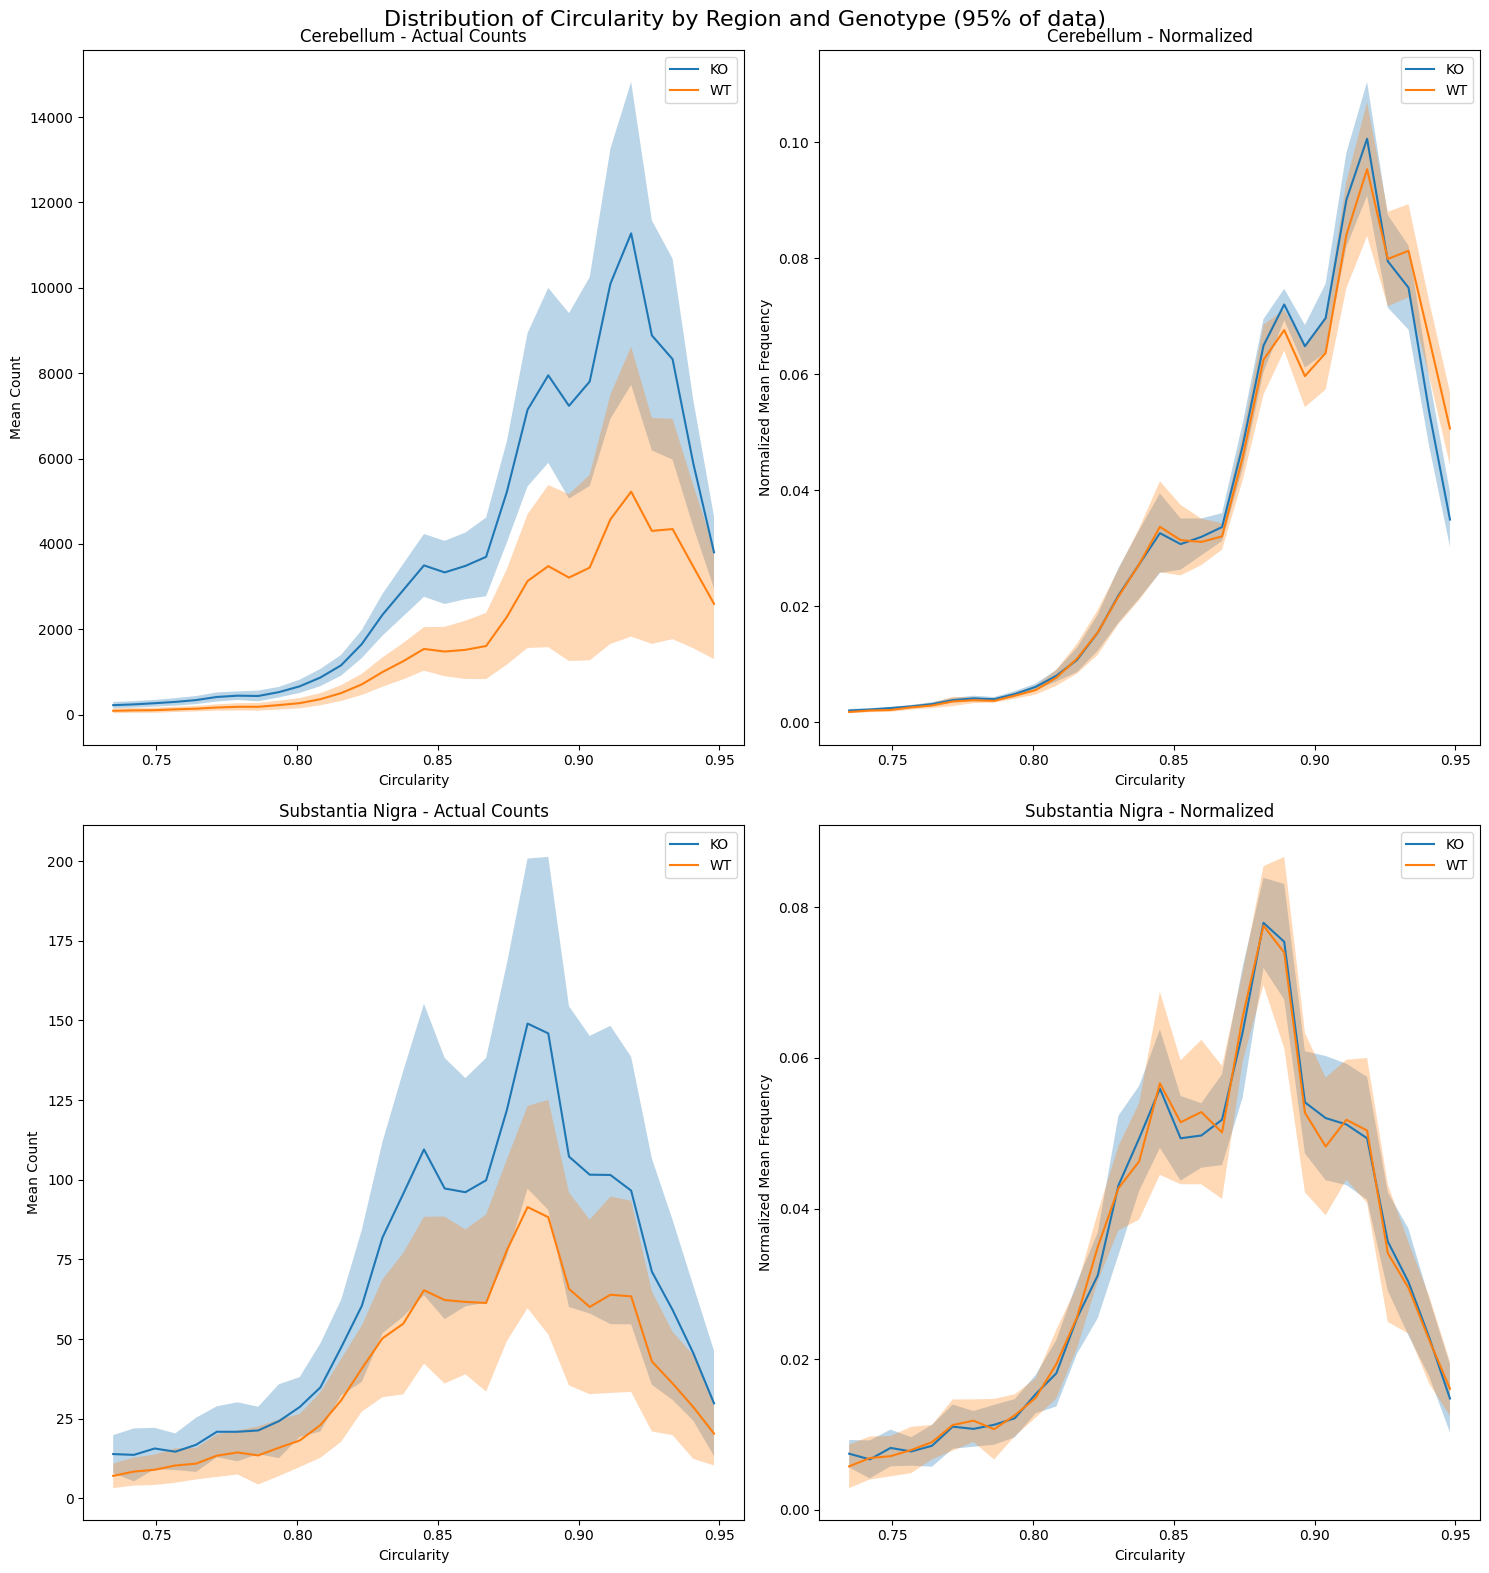

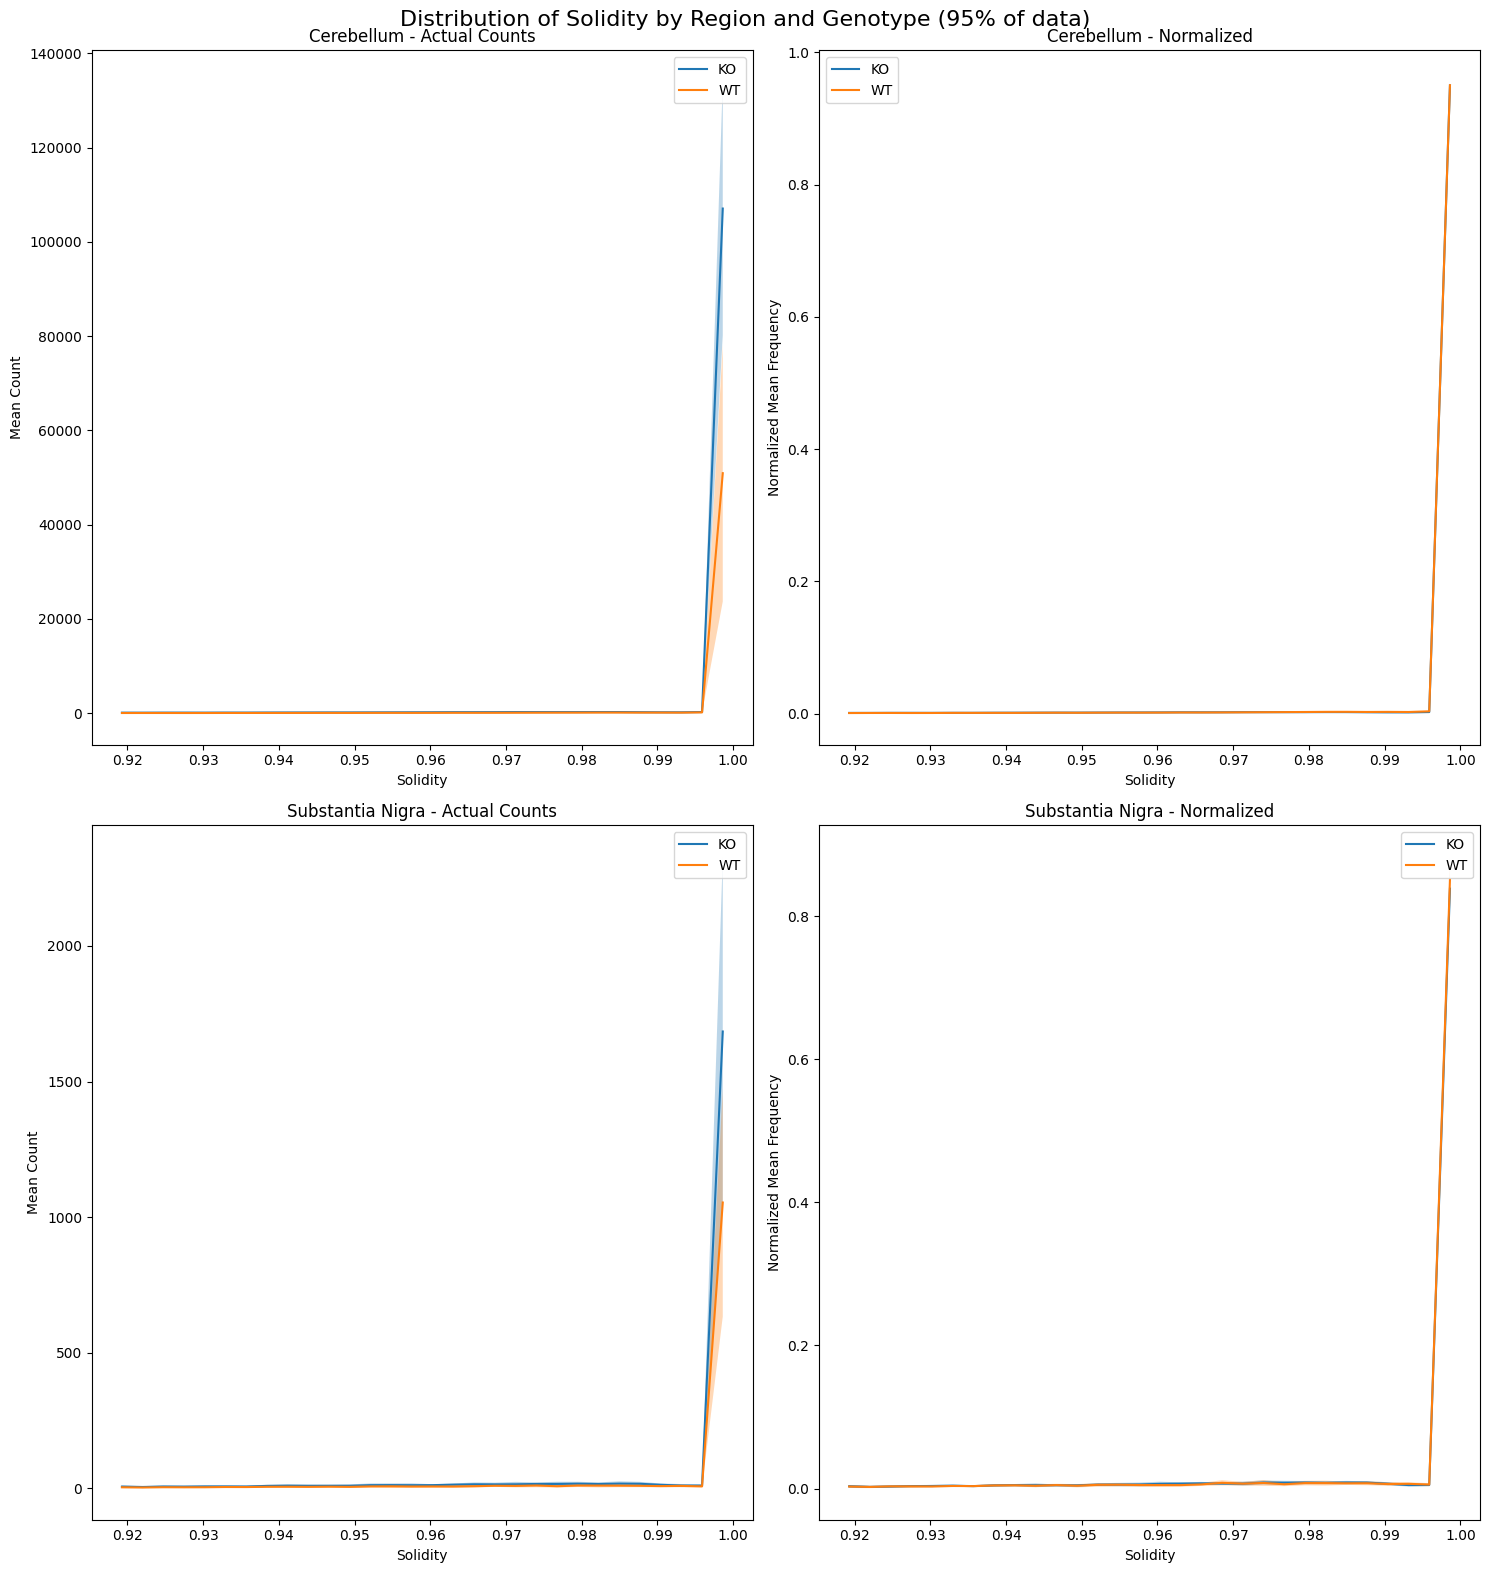

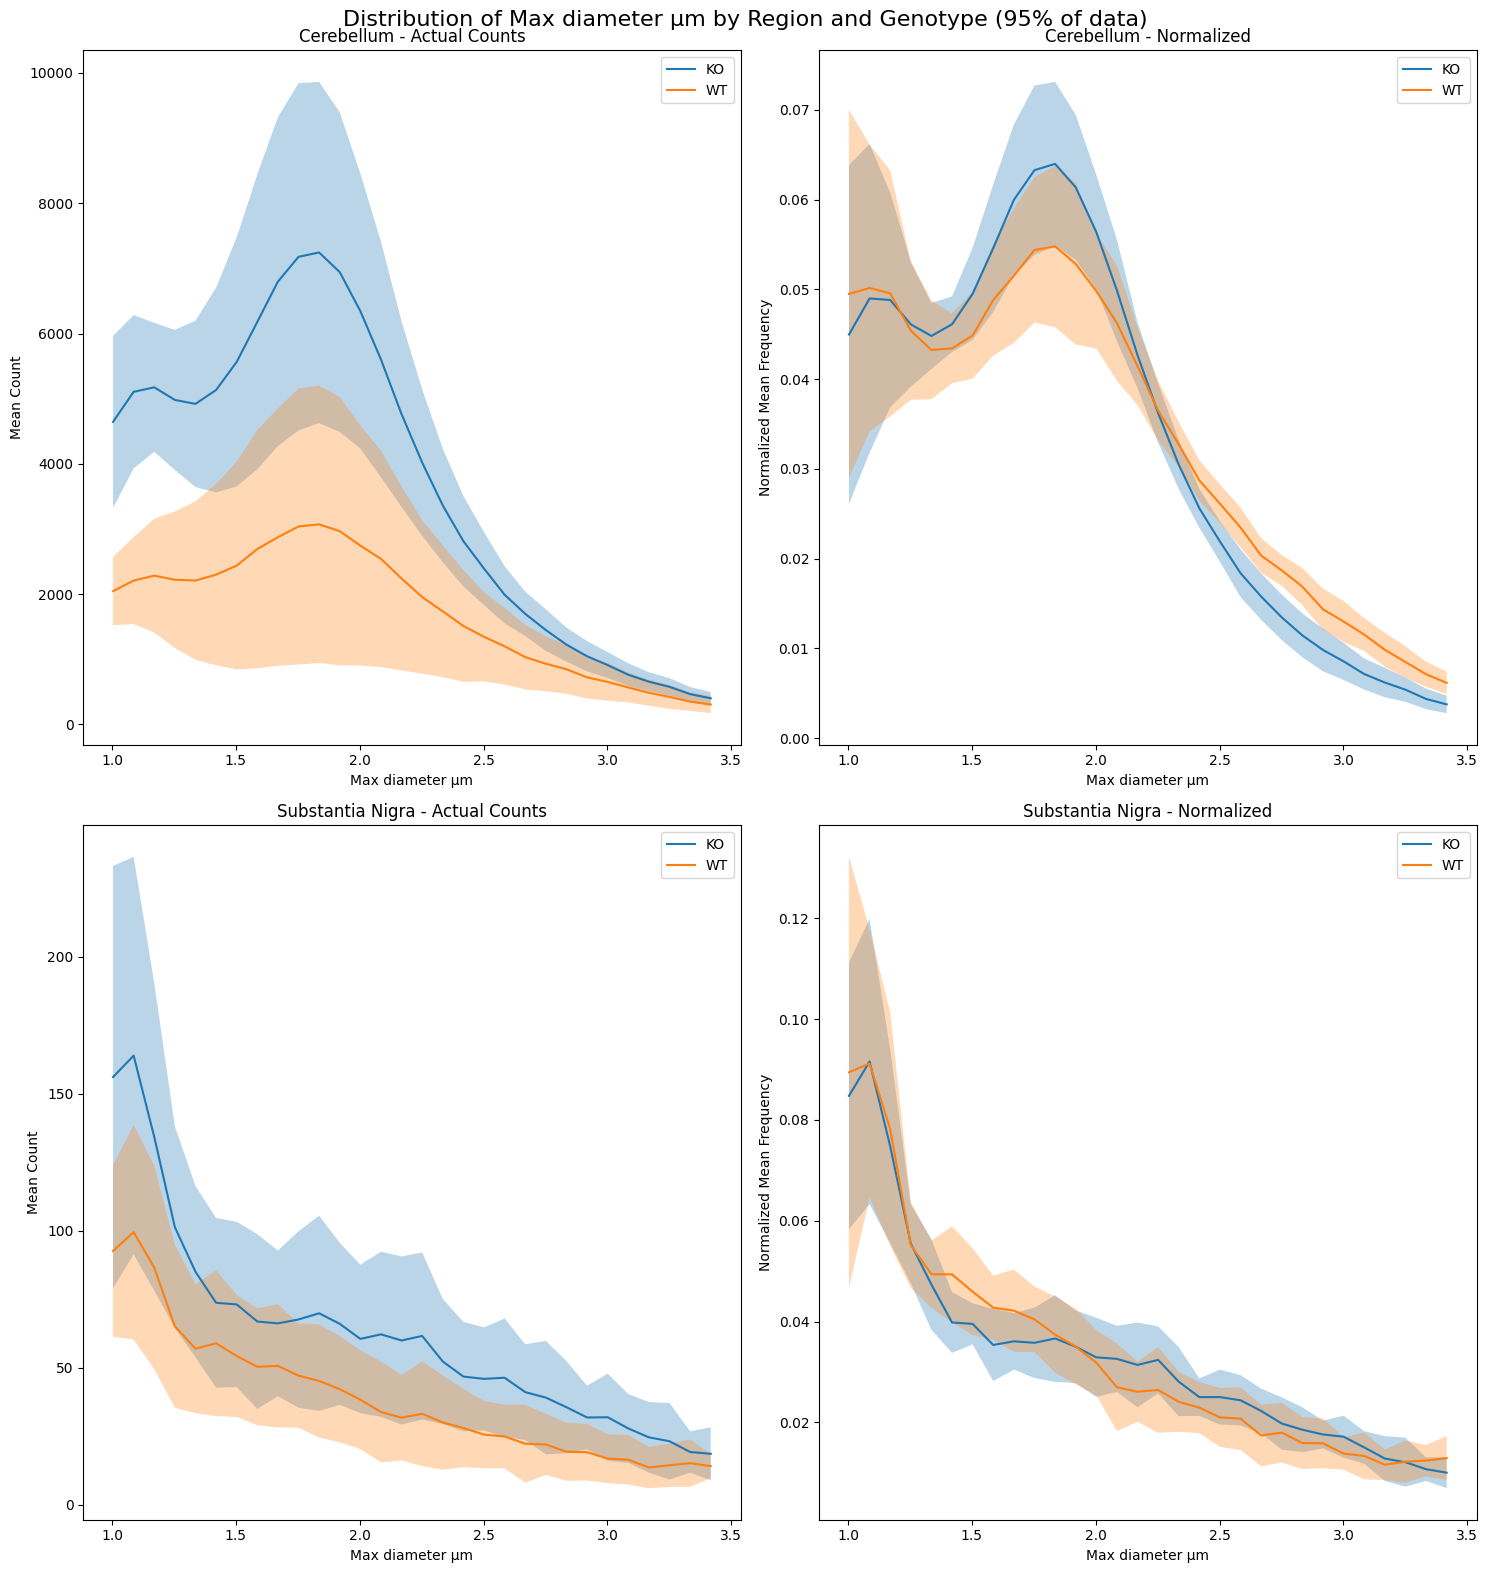

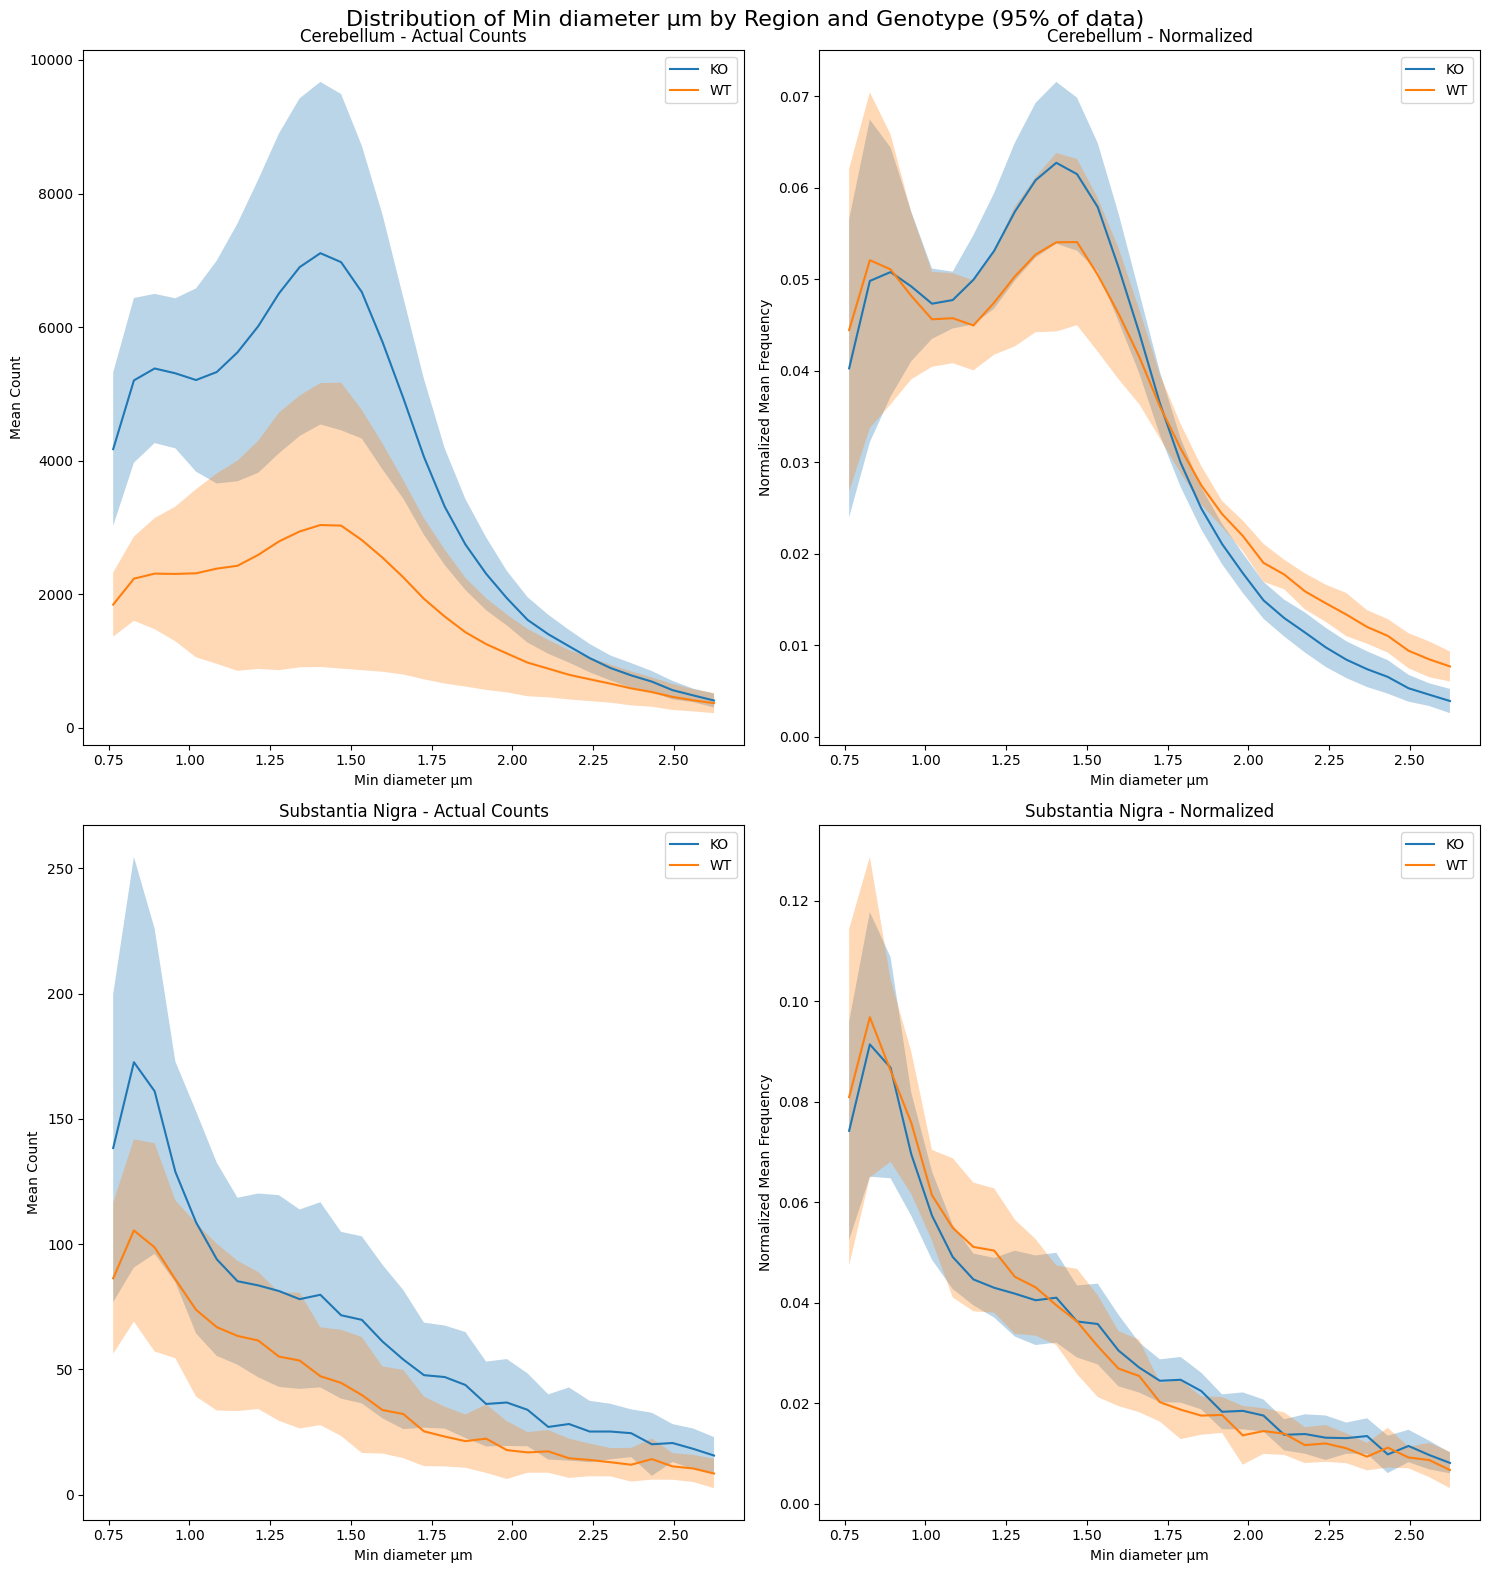

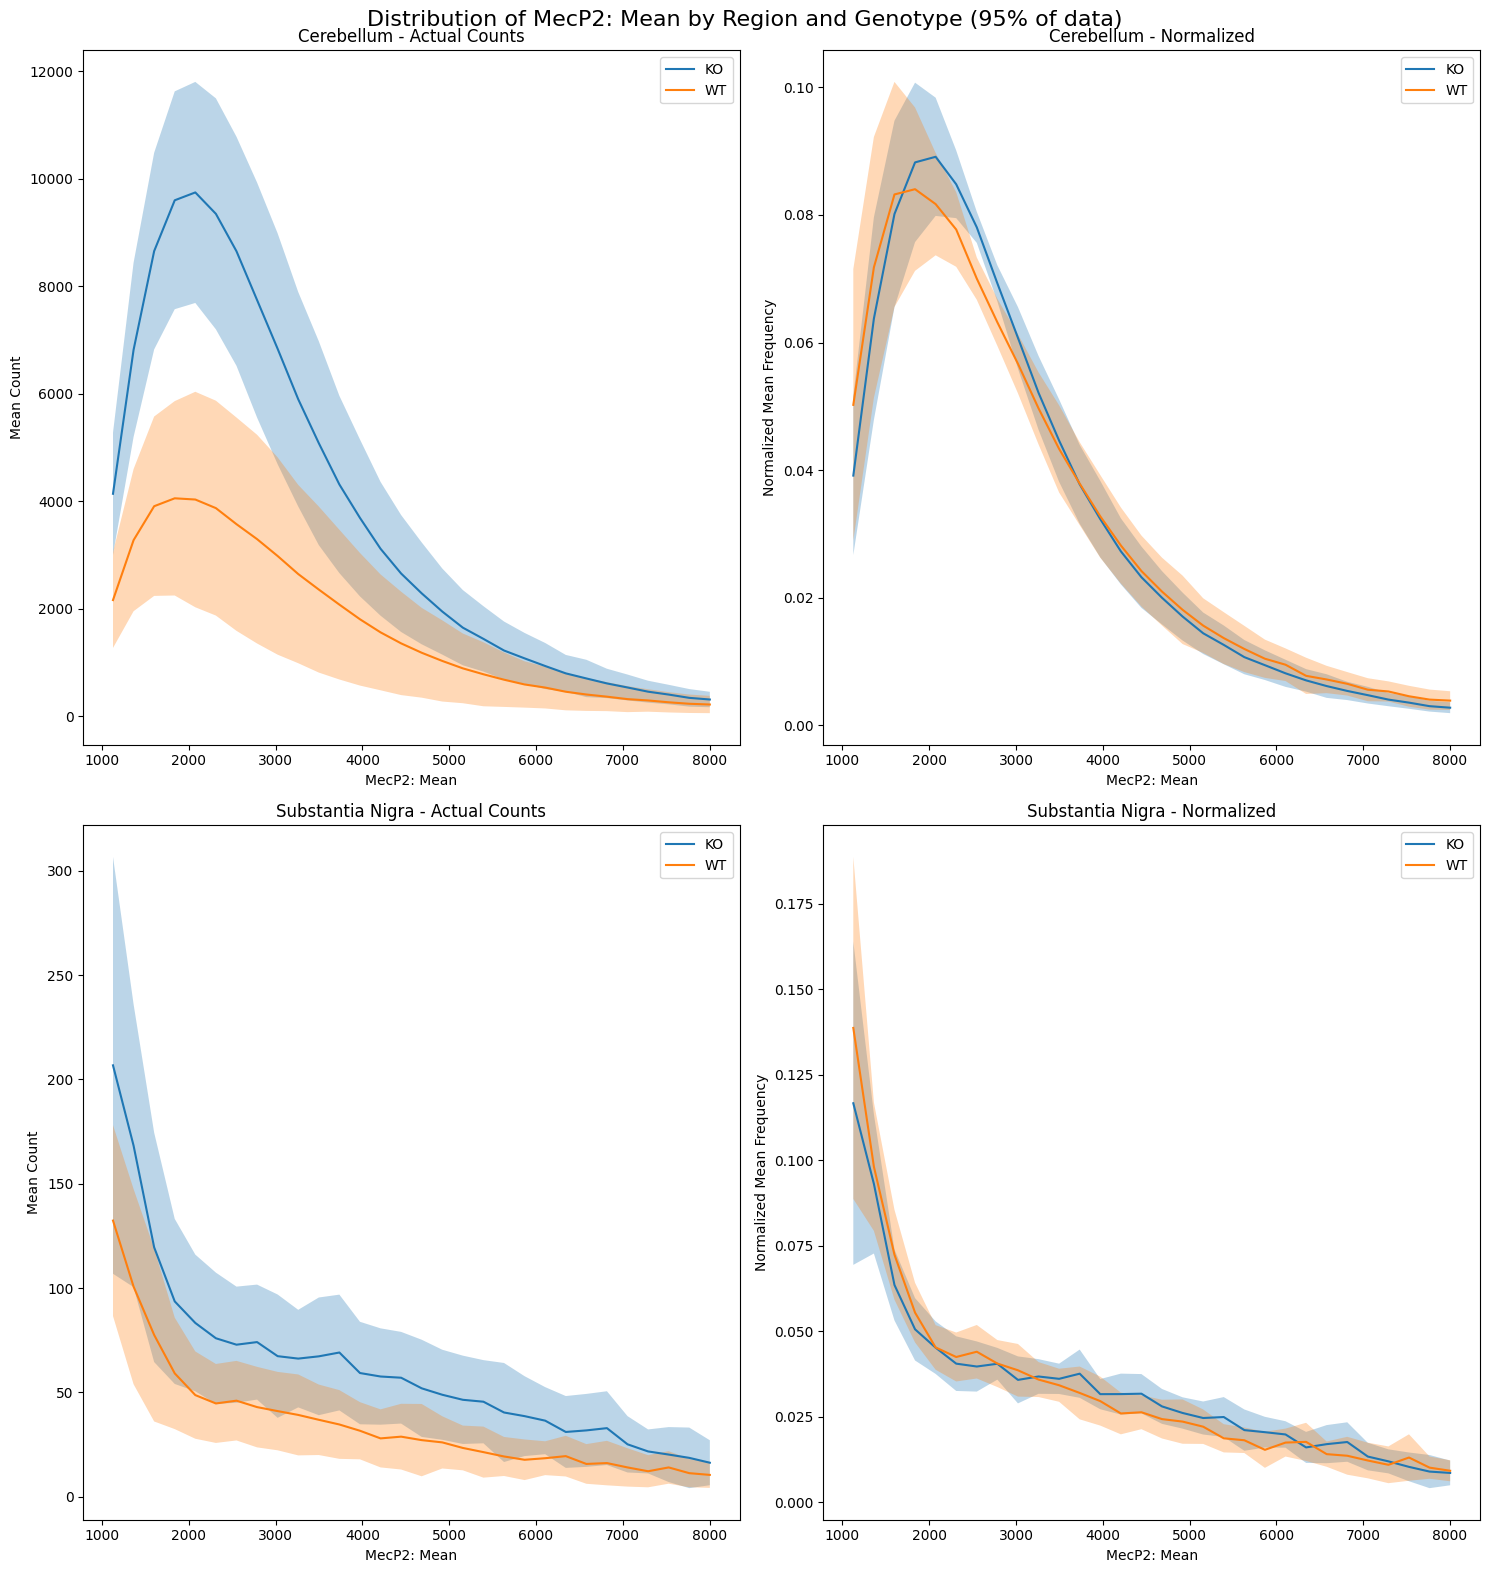

Script execution completed.


In [ ]:
# Define the features we want to analyze
features = ['Area µm^2', 'Length µm', 'Circularity', 'Solidity', 'Max diameter µm', 'Min diameter µm', 'MecP2: Mean']

# Function to calculate histograms
def calculate_histograms(data, bins):
    # Create a histogram of the data using the specified bins
    hist, _ = np.histogram(data, bins=bins)
    # Return both the actual counts and the normalized histogram (probabilities)
    return hist, hist / np.sum(hist)

# Function to get the data range for a specified percentile
def get_data_range(data, percentile=95):
    # Calculate the lower bound of the range
    lower = np.percentile(data, (100 - percentile) / 2)
    # Calculate the upper bound of the range
    upper = np.percentile(data, 100 - (100 - percentile) / 2)
    return lower, upper

# Main function to plot distributions by region
def plot_distributions_by_region(data, feature, n_bins=30, percentile=95):
    # Get the global data range for the specified percentile
    lower, upper = get_data_range(data[feature], percentile)

    # Create equally spaced bins within the specified range
    bins = np.linspace(lower, upper, n_bins + 1)

    # Get unique regions and genotypes from the data
    regions = data['Region'].unique()
    genotypes = data['Genotype'].unique()

    # Create a figure with subplots: 2 columns, and as many rows as there are regions
    fig, axs = plt.subplots(len(regions), 2, figsize=(15, 8 * len(regions)))
    # Set an overall title for the figure
    fig.suptitle(f'Distribution of {feature} by Region and Genotype ({percentile}% of data)', fontsize=16)

    # Loop through each region
    for i, region in enumerate(regions):
        # Filter data for the current region
        region_data = data[data['Region'] == region]

        # Initialize dictionaries to store histograms for each genotype
        actual_histograms = {}
        normalized_histograms = {}

        # Calculate histograms for each genotype in this region
        for genotype in genotypes:
            # Filter data for the current genotype
            genotype_data = region_data[region_data['Genotype'] == genotype]
            animal_hists_actual = []
            animal_hists_norm = []

            # Calculate histograms for each animal in this genotype
            for _, animal_data in genotype_data.groupby('Animal'):
                hist_actual, hist_norm = calculate_histograms(animal_data[feature], bins)
                animal_hists_actual.append(hist_actual)
                animal_hists_norm.append(hist_norm)

            # Store the histograms for this genotype
            actual_histograms[genotype] = np.array(animal_hists_actual)
            normalized_histograms[genotype] = np.array(animal_hists_norm)

        # Calculate mean and standard deviation of histograms for each genotype
        mean_hists_actual = {genotype: np.mean(hists, axis=0) for genotype, hists in actual_histograms.items()}
        std_hists_actual = {genotype: np.std(hists, axis=0) for genotype, hists in actual_histograms.items()}
        mean_hists_norm = {genotype: np.mean(hists, axis=0) for genotype, hists in normalized_histograms.items()}
        std_hists_norm = {genotype: np.std(hists, axis=0) for genotype, hists in normalized_histograms.items()}

        # Calculate the center of each bin for plotting
        bin_centers = (bins[:-1] + bins[1:]) / 2

        # Plot actual counts
        ax_actual = axs[i, 0]  # Left subplot for actual counts
        for genotype, mean_hist in mean_hists_actual.items():
            # Plot the mean histogram for this genotype
            ax_actual.plot(bin_centers, mean_hist, label=genotype)
            # Add shaded area for standard deviation
            ax_actual.fill_between(bin_centers,
                                   mean_hist - std_hists_actual[genotype],
                                   mean_hist + std_hists_actual[genotype],
                                   alpha=0.3)

        # Set labels and title for the actual counts plot
        ax_actual.set_xlabel(feature)
        ax_actual.set_ylabel('Mean Count')
        ax_actual.set_title(f'{region} - Actual Counts')
        ax_actual.legend()

        # Plot normalized frequencies
        ax_norm = axs[i, 1]  # Right subplot for normalized frequencies
        for genotype, mean_hist in mean_hists_norm.items():
            # Plot the mean normalized histogram for this genotype
            ax_norm.plot(bin_centers, mean_hist, label=genotype)
            # Add shaded area for standard deviation
            ax_norm.fill_between(bin_centers,
                                 mean_hist - std_hists_norm[genotype],
                                 mean_hist + std_hists_norm[genotype],
                                 alpha=0.3)

        # Set labels and title for the normalized frequencies plot
        ax_norm.set_xlabel(feature)
        ax_norm.set_ylabel('Normalized Mean Frequency')
        ax_norm.set_title(f'{region} - Normalized')
        ax_norm.legend()

    # Adjust the layout to prevent overlapping
    plt.tight_layout()
    # Save the figure as a PNG file
    plt.savefig(f"{feature.replace(' ', '_').replace('^', '')}_{percentile}percentile_distributions_by_region.png")
    # Display the plot
    plt.show()
    # Close the figure to free up memory
    plt.close()

# Create plots for each feature
for feature in features:
    plot_distributions_by_region(filtered_df, feature, percentile=95)

print("Script execution completed.")

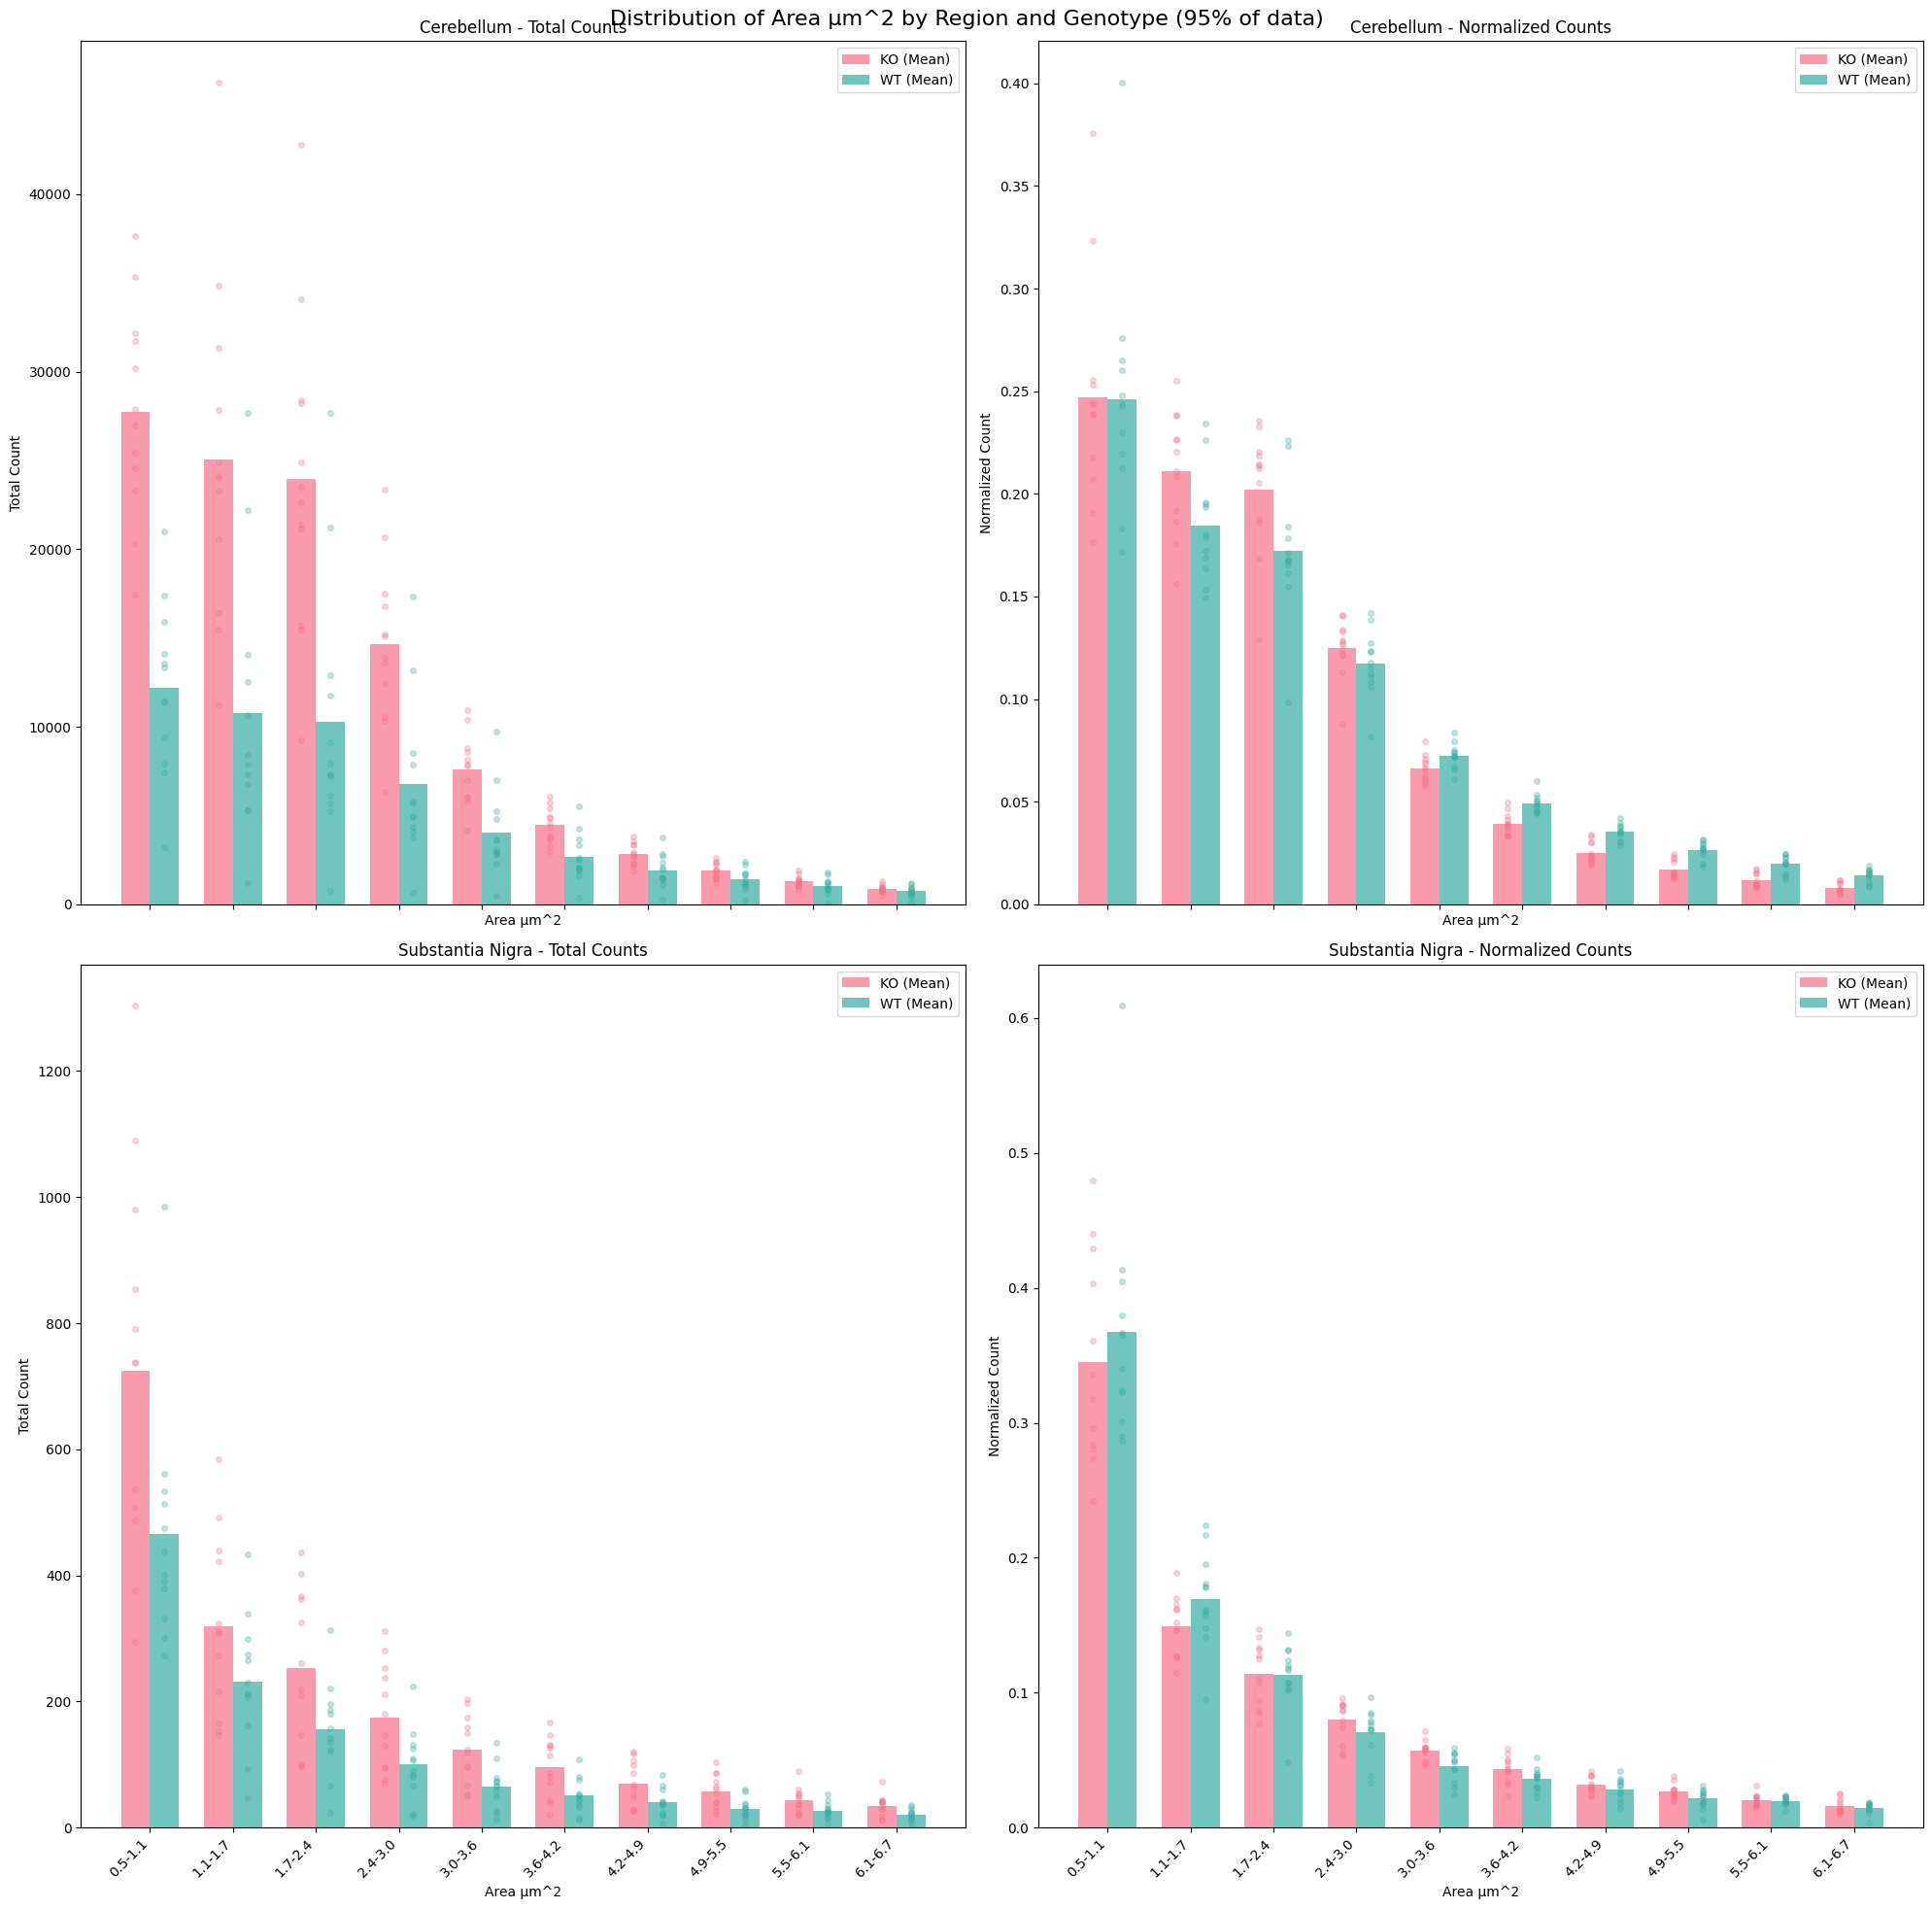

Detailed area comparison script with side-by-side bars execution completed.


In [ ]:
def compare_area_bins(data, n_bins=10, percentile=95):
    # Filter for the 'Area µm^2' feature
    area_data = data['Area µm^2']

    # Get the data range for the specified percentile
    lower, upper = np.percentile(area_data, [(100 - percentile) / 2, 100 - (100 - percentile) / 2])

    # Create equally spaced bins within the specified range
    bins = np.linspace(lower, upper, n_bins + 1)

    # Get unique regions and genotypes from the data
    regions = data['Region'].unique()
    genotypes = data['Genotype'].unique()

    # Create a figure with subplots: two rows for each region (total counts and normalized counts)
    fig, axs = plt.subplots(len(regions), 2, figsize=(20, 10 * len(regions)), sharex='col')
    fig.suptitle(f'Distribution of Area µm^2 by Region and Genotype ({percentile}% of data)', fontsize=16)

    # Create a color palette for genotypes
    color_palette = sns.color_palette("husl", n_colors=len(genotypes))

    for i, region in enumerate(regions):
        region_data = data[data['Region'] == region]

        bin_counts = {genotype: [] for genotype in genotypes}
        bin_counts_normalized = {genotype: [] for genotype in genotypes}

        for genotype in genotypes:
            genotype_data = region_data[region_data['Genotype'] == genotype]
            for _, animal_data in genotype_data.groupby('Animal'):
                hist, _ = np.histogram(animal_data['Area µm^2'], bins=bins)
                bin_counts[genotype].append(hist)
                bin_counts_normalized[genotype].append(hist / len(animal_data))

        # Convert to numpy arrays for easier manipulation
        for genotype in genotypes:
            bin_counts[genotype] = np.array(bin_counts[genotype])
            bin_counts_normalized[genotype] = np.array(bin_counts_normalized[genotype])

        # Plot total counts
        ax_total = axs[i, 0]
        ax_norm = axs[i, 1]

        x = np.arange(n_bins)
        width = 0.35  # the width of the bars

        for j, genotype in enumerate(genotypes):
            # Plot mean total counts
            mean_counts = np.mean(bin_counts[genotype], axis=0)
            ax_total.bar(x + j*width, mean_counts, width, alpha=0.7, color=color_palette[j], label=f'{genotype} (Mean)')

            # Plot individual animal data points
            for animal_counts in bin_counts[genotype]:
                ax_total.plot(x + j*width, animal_counts, 'o', color=color_palette[j], alpha=0.3, markersize=4)

            # Plot mean normalized counts
            mean_norm_counts = np.mean(bin_counts_normalized[genotype], axis=0)
            ax_norm.bar(x + j*width, mean_norm_counts, width, alpha=0.7, color=color_palette[j], label=f'{genotype} (Mean)')

            # Plot individual animal normalized data points
            for animal_norm_counts in bin_counts_normalized[genotype]:
                ax_norm.plot(x + j*width, animal_norm_counts, 'o', color=color_palette[j], alpha=0.3, markersize=4)

        # Set labels and title
        for ax in [ax_total, ax_norm]:
            ax.set_xlabel('Area µm^2')
            ax.set_xticks(x + width / 2)
            ax.set_xticklabels([f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(n_bins)], rotation=45, ha='right')
            ax.legend()

        ax_total.set_ylabel('Total Count')
        ax_norm.set_ylabel('Normalized Count')
        ax_total.set_title(f'{region} - Total Counts')
        ax_norm.set_title(f'{region} - Normalized Counts')

    plt.tight_layout()
    plt.savefig(f"Area_comparison_detailed_sidebyside_{percentile}percentile.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Use the function
compare_area_bins(filtered_df, n_bins=10, percentile=95)

print("Detailed area comparison script with side-by-side bars execution completed.")

In [1]:
def prepare_prism_data(data, region, feature):
    # Filter data for the specific region
    region_data = data[data['Region'] == region]

    # Determine the range of the data
    min_value = np.floor(region_data[feature].min())
    max_value = np.ceil(region_data[feature].max())

    # Create bins with 1 µm² increments
    bins = np.arange(min_value, max_value + 1, 1)

    # Initialize the result dataframes for total and normalized counts
    result_total = pd.DataFrame()
    result_normalized = pd.DataFrame()

    for genotype, group in zip(['WT', 'KO'], ['A', 'B']):
        genotype_data = region_data[region_data['Genotype'] == genotype]

        for i, (_, animal_data) in enumerate(genotype_data.groupby('Animal'), 1):
            hist, _ = np.histogram(animal_data[feature], bins=bins)
            column_name = f"{group}.{i}"
            result_total[column_name] = hist
            result_normalized[column_name] = hist / len(animal_data)

    # Set index to represent bin ranges
    bin_labels = [f"{bins[i]:.0f}-{bins[i+1]:.0f}" for i in range(len(bins)-1)]
    result_total.index = bin_labels
    result_normalized.index = bin_labels

    return result_total, result_normalized

# Assuming you have your data in a DataFrame called 'filtered_df'
# with columns 'Region', 'Genotype', 'Animal', and 'Area µm^2'

# Prepare data for cerebellum
cerebellum_total, cerebellum_normalized = prepare_prism_data(filtered_df, 'Cerebellum', 'Area µm^2')

# Prepare data for substantia nigra
substantia_nigra_total, substantia_nigra_normalized = prepare_prism_data(filtered_df, 'Substantia Nigra', 'Area µm^2')

# Save to CSV files
cerebellum_total.to_csv('cerebellum_total_counts.csv')
cerebellum_normalized.to_csv('cerebellum_normalized_counts.csv')
substantia_nigra_total.to_csv('substantia_nigra_total_counts.csv')
substantia_nigra_normalized.to_csv('substantia_nigra_normalized_counts.csv')

print("Data preparation for Prism completed. CSV files have been generated.")

NameError: name 'filtered_df' is not defined

Starting t-SNE computation on 50000 samples...
t-SNE computation completed in 250.62 seconds.
Plot saved as tsne_plot_50000_samples.png


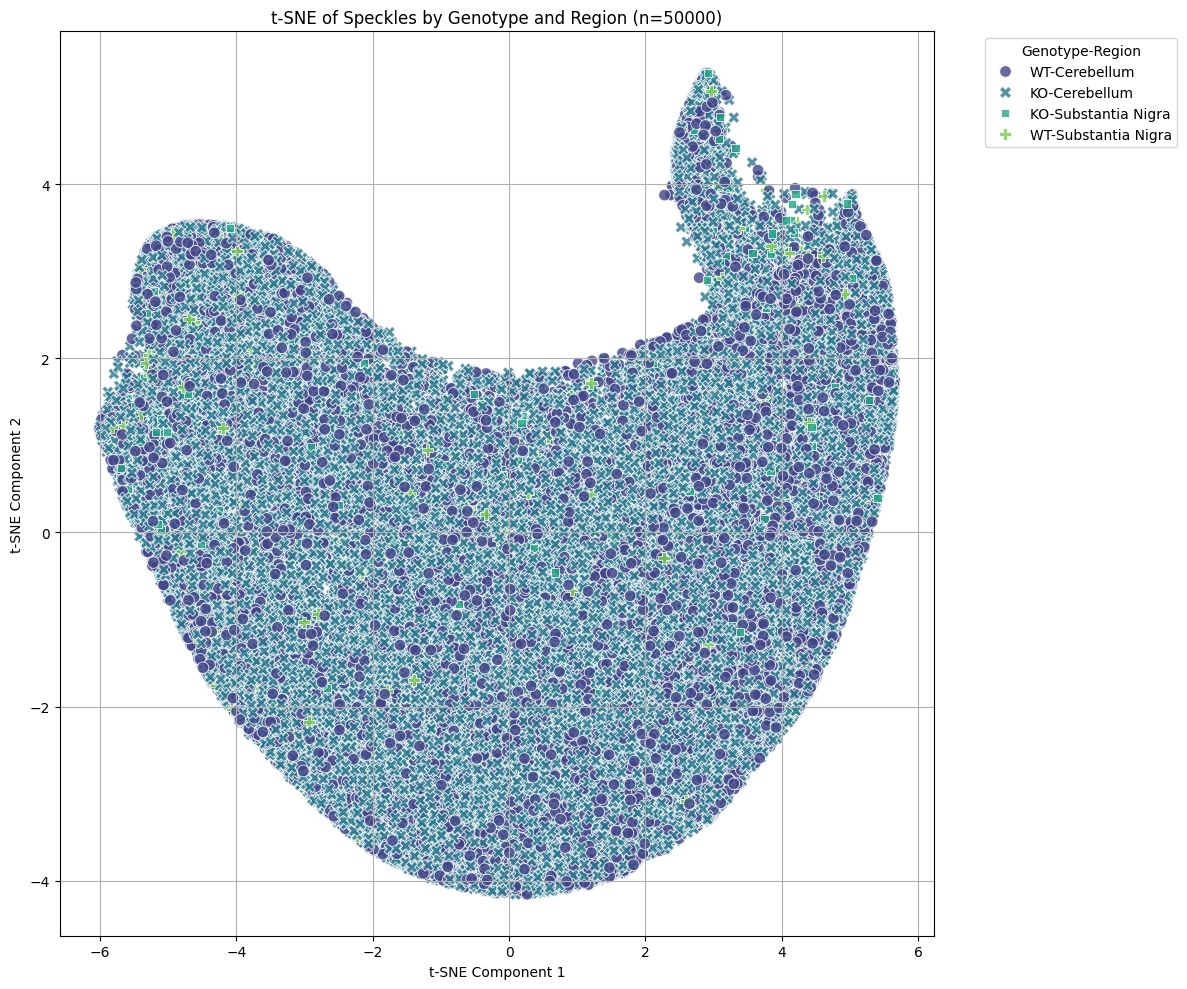

t-SNE analysis and visualization completed for all sample sizes.


In [ ]:
def downsample_dataframe(df, n_samples):
    """Randomly downsample a dataframe to a specified number of samples."""
    if len(df) > n_samples:
        return df.sample(n=n_samples, random_state=42)
    return df

def perform_tsne_analysis(df, n_samples):
    """Perform t-SNE analysis on a downsampled dataframe."""
    downsampled_df = downsample_dataframe(df, n_samples)

    features = ['Area µm^2', 'Length µm', 'Circularity', 'Solidity', 'Max diameter µm', 'Min diameter µm', 'MecP2: Mean']
    X = downsampled_df[features]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print(f"Starting t-SNE computation on {n_samples} samples...")
    start_time = time.time()

    tsne = TSNE(n_components=2,
                perplexity=min(50, n_samples - 1),
                learning_rate=200,
                n_iter=250,
                random_state=42)

    X_tsne = tsne.fit_transform(X_scaled)

    end_time = time.time()
    print(f"t-SNE computation completed in {end_time - start_time:.2f} seconds.")

    downsampled_df['TSNE-1'] = X_tsne[:, 0]
    downsampled_df['TSNE-2'] = X_tsne[:, 1]

    return downsampled_df

def plot_tsne(df, n_samples):
    """Plot the results of t-SNE analysis and save the plot."""
    df['Genotype_Region'] = df['Genotype'] + '-' + df['Region']

    plt.figure(figsize=(12, 10))

    sns.scatterplot(x='TSNE-1', y='TSNE-2',
                    hue='Genotype_Region',
                    style='Genotype_Region',
                    data=df,
                    palette='viridis',
                    s=70,
                    alpha=0.8)

    plt.title(f't-SNE of Speckles by Genotype and Region (n={n_samples})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')

    plt.legend(title='Genotype-Region', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.grid(True)

    # Save the plot
    plt.savefig(f'tsne_plot_{n_samples}_samples.png', dpi=300, bbox_inches='tight')
    print(f"Plot saved as tsne_plot_{n_samples}_samples.png")

    plt.show()

# Main execution
n_samples = 50000
tsne_df = perform_tsne_analysis(filtered_df, n_samples)
plot_tsne(tsne_df, n_samples)

print("t-SNE analysis and visualization completed for all sample sizes.")